In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import copy
import scipy as sp
import matplotlib.pyplot as plt

Data = pd.read_csv("network_backup_dataset.csv")
labels = Data.columns
for i, v in enumerate(labels):
    print "labels[" + str(i) + "] => " + v

def convert_OneDimension(label, data):
    
    if label == labels[1]:
        days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        for day, number in zip(days, range(len(days))):
            data = data.replace({'Day of Week': {day : number}})
        return data
    
    elif label == labels[3]:
        work_flow_ids = ['work_flow_0', 'work_flow_1','work_flow_2','work_flow_3', 'work_flow_4']
        for work_flow, number in zip(work_flow_ids, range(len(work_flow_ids))):
            data = data.replace({'Work-Flow-ID' : {work_flow : number}})
        return data
    
    elif label == labels[4]:
        uniqueFiles = ['File_{0}'.format(s) for s in range(len((pd.unique(Data['File Name']))))]
        for file_name, number in zip(uniqueFiles,range(len(uniqueFiles))):
            data = data.replace({'File Name' : {file_name : number}})
        return data      
    else:
        return data

for i in range(len(labels)):
    Data = convert_OneDimension(labels[i], Data)

labels[0] => Week #
labels[1] => Day of Week
labels[2] => Backup Start Time - Hour of Day
labels[3] => Work-Flow-ID
labels[4] => File Name
labels[5] => Size of Backup (GB)
labels[6] => Backup Time (hour)


Done. Continue
Done. Continue
Done. Continue
Done. Continue
Done. Continue
Done. Continue
Done. Continue
Done. Continue
Done. Continue
Done. Continue


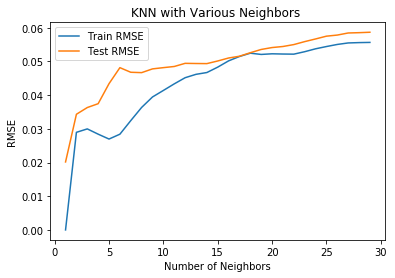

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=10)
train_data = Data.iloc[:, :5]
target_data = Data[labels[5]]
target_data = np.asarray(target_data)

neighbors_range = range(1,30)


train_mse = [0] * len(neighbors_range)
test_mse = [0] * len(neighbors_range)
for train_index, test_index in kf.split(train_data):
    train_sample = train_data.iloc[train_index, :]
    train_target = target_data[train_index]
    test_sample = train_data.iloc[test_index, :]
    test_target = target_data[test_index]
    
    for i, n in enumerate(neighbors_range):
        neigh = KNeighborsRegressor(n_neighbors=n)
        neigh.fit(train_sample, train_target)
        
        train_predicted = neigh.predict(train_sample)
        test_predicted = neigh.predict(test_sample)

        train_mse[i] += mean_squared_error(train_target, train_predicted)
        test_mse[i] += mean_squared_error(test_target, test_predicted)
    print 'Done. Continue'
train_rmse = map(lambda x: (x / 10) ** 0.5, train_mse)
test_rmse = map(lambda x: (x / 10) ** 0.5, test_mse)

plt.plot(neighbors_range, train_rmse, label = 'Train RMSE')
plt.plot(neighbors_range, test_rmse, label = 'Test RMSE')
plt.title('KNN with Various Neighbors ')
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [3]:
def twoplots(predict, target):

    fig, ax = plt.subplots()
    ax.scatter(target, predict)
    ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw = 4)
    ax.set_xlabel('True')
    ax.set_ylabel('Fitted')
    plt.title('Fitted Values Vs Actural Values')
    plt.show()

    fig, ax = plt.subplots()
    ax.scatter(predict, predict-target)
    ax.set_xlabel('Fitted')
    ax.set_ylabel('Residual')
    plt.title('Residuals Vs Fitted Values')
    plt.show()

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


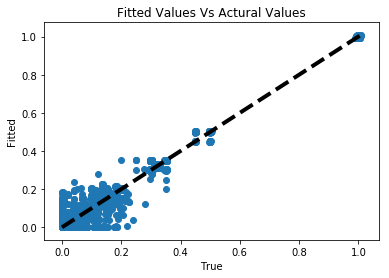

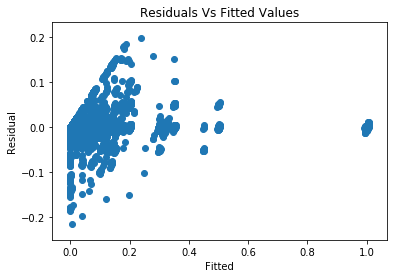

In [4]:
from sklearn.cross_validation import cross_val_predict
neigh = KNeighborsRegressor(n_neighbors = 1)
train_data = Data.iloc[:, :5]
target_data = Data[labels[5]]
target_data = np.asarray(target_data)
predicted = cross_val_predict(neigh, train_data, target_data, cv = 10)
twoplots(predicted, target_data)